# Considerations and figures for supplementary figure 1 A and B (spike-and-slab LASSO prior)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Define functions for calculating the double-exponential density $\psi$, the practical significance threshold $\delta$,
and the likelihood penalty formulation of the spike-and-slab LASSO prior, all defined by Rockova and George.

In [2]:
def psi(l, b):
    return l/2 * np.exp(-1*l * np.abs(b))

def delta(l_0, l_1, theta):
    p_t = (theta*l_1/2) / ((theta*l_1/2) + ((1-theta)*l_0/2))
    return 1/(l_0 - l_1) * np.log(1/p_t - 1)

def pen(l_0, l_1, theta, b):
    p_0 = (theta * psi(l_1, 0)) / (theta * psi(l_1, 0) + (1-theta) * psi(l_0, 0))
    p_b = (theta * psi(l_1, b)) / (theta * psi(l_1, b) + (1-theta) * psi(l_0, b))
    return -1 * l_1 * np.abs(b) + np.log(p_0/p_b)

## Figure S1A (Double exponential density)

In [3]:
betas = np.round(np.linspace(-1, 1, 1000), 3)
lambdas = [0.1, 1, 5, 10, 20]

psi_df = pd.DataFrame(index=pd.MultiIndex.from_product([betas, lambdas], names=["beta", "lambda"])).reset_index()
psi_df["psi"] = psi(psi_df["lambda"], psi_df["beta"])
psi_df

,beta,lambda,psi
0,-1.0,0.1,4.524187e-02
1,-1.0,1.0,1.839397e-01
2,-1.0,5.0,1.684487e-02
3,-1.0,10.0,2.269996e-04
4,-1.0,20.0,2.061154e-08
...,...,...,...
4995,1.0,0.1,4.524187e-02
4996,1.0,1.0,1.839397e-01
4997,1.0,5.0,1.684487e-02
4998,1.0,10.0,2.269996e-04


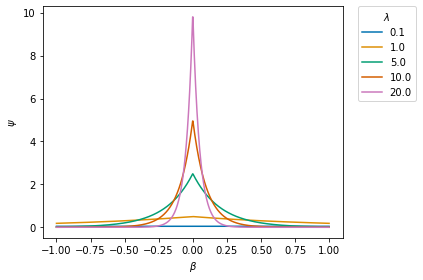

In [4]:
sns.lineplot(data = psi_df, x="beta", y="psi", hue="lambda", palette="colorblind")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=r"$\lambda$")
plt.xlabel(r"$\beta$")
plt.ylabel(r"$\psi$")
plt.tight_layout()

# plt.savefig("double_exponential.svg", format="svg", bbox_inches="tight")
plt.show()

## Figure S1B (Spike-and-slab LASSO as a likelihood penalty)

In [8]:
betas = np.round(np.linspace(-2, 2, 1000), 3)
theta = [0.1]
l_0 = [1, 5, 10, 20, 50]
l_1 = [1, 5, 10]

pen_df = pd.DataFrame(index=pd.MultiIndex.from_product([betas, l_0, l_1, theta], names=["beta", "lambda_0", "lambda_1", "theta"])).reset_index()
pen_df["pen"] = pen(pen_df["lambda_0"], pen_df["lambda_1"], pen_df["theta"], pen_df["beta"])
pen_df

,beta,lambda_0,lambda_1,theta,pen
0,-2.0,1,1,0.1,-2.000000
1,-2.0,1,5,0.1,-2.441646
2,-2.0,1,10,0.1,-2.747214
3,-2.0,5,1,0.1,-5.813658
4,-2.0,5,5,0.1,-10.000000
...,...,...,...,...,...
14995,2.0,20,5,0.1,-13.610918
14996,2.0,20,10,0.1,-22.944439
14997,2.0,50,1,0.1,-8.111467
14998,2.0,50,5,0.1,-14.510860


['lambda_0', '1', '5', '10', '20', '50', 'lambda_1', '1', '5', '10']


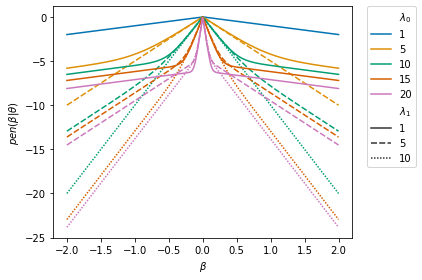

In [11]:
g = sns.lineplot(data = pen_df[pen_df["lambda_0"] >= pen_df["lambda_1"]], x="beta", y="pen",
                 hue="lambda_0",
                 style="lambda_1", palette="colorblind")

g.legend(
    bbox_to_anchor=(1.05, 1),
    loc=2,
    borderaxespad=0.,
    handles = g.get_legend_handles_labels()[0],
    labels=[r"$\lambda_0$", "1", "5", "10", "15", "20", r"$\lambda_1$", "1", "5", "10"]
)

plt.xlabel(r"$\beta$")
plt.ylabel(r"$pen(\beta|\theta)$")
plt.tight_layout()

print(g.get_legend_handles_labels()[1])
# plt.savefig("penalties.svg", format="svg", bbox_inches="tight")
plt.show()